In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import wave
import os.path as os
from scipy.fftpack import fft, ifft
from scipy.signal import filtfilt, butter
from scipy.integrate import simpson #Usando la regla de Simpson para calcular el área bajo la curva

In [2]:
carpeta = os.abspath('/Users/yann/Documents/Datos/EEG/') #localización del 
#archivo en tu computadora
datos = pd.read_csv(carpeta +'/H24_OC_OA.csv') #creación de un dataframe
#al que únicamente debes modificar el nombre del archivo con su extensión
datos #comando para presentar el dataframe

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4339.49,4521.03,4187.69,4627.69,4339.49,4112.31,4348.72,4252.31,4932.82,4447.69,4475.38,4738.46,4420.51,4598.46
1,4346.67,4527.18,4202.05,4633.85,4342.05,4122.05,4366.67,4267.69,4949.74,4465.64,4485.64,4749.74,4432.82,4611.28
2,4350.26,4540.00,4207.18,4643.08,4341.54,4122.05,4374.87,4271.28,4954.36,4462.56,4485.13,4747.18,4430.77,4612.31
3,4337.95,4530.77,4198.46,4638.46,4336.92,4118.97,4372.31,4258.97,4936.92,4441.03,4472.31,4734.87,4413.85,4598.46
4,4334.87,4519.49,4189.23,4629.23,4342.05,4118.97,4369.74,4245.64,4923.08,4436.41,4471.28,4731.79,4416.41,4596.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23122,4414.87,4522.05,4201.54,4683.08,4384.62,4105.64,4361.54,4217.44,4892.82,4362.05,4493.85,4757.44,4426.67,4627.18
23123,4413.85,4524.10,4200.51,4685.64,4388.72,4106.15,4349.74,4196.92,4875.90,4346.67,4476.92,4749.74,4412.82,4614.36
23124,4416.41,4523.08,4204.62,4690.26,4391.28,4102.05,4337.44,4183.59,4875.90,4349.74,4477.95,4752.82,4412.31,4616.41
23125,4413.85,4520.51,4205.13,4687.69,4383.08,4094.36,4336.41,4183.59,4875.90,4352.31,4485.64,4753.33,4413.33,4617.95


In [3]:
fm=128 #frecuencia de muestreo
ti=0 #tiempo de inicio, debe ser número entero
tf=180 #tiempo final, debe ser número entero
pt=(tf-ti)*fm#numero de puntos
t1=ti*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2=tf*fm #nos ayuda a dar la posición de la fila para el tiempo final
nombres=list(datos) #almacena los nombres de los encabezados en una lista
t=np.linspace(ti,tf,pt) 
filtg=[]
for i in range (0,14):
    al=np.array(datos)[t1:t2,i]
    nyq = 128*0.5 #frecuencia de muestreo y ripple
    low = 2 / nyq #ancho de banda inferior
    high = 45 / nyq #ancho de banda superior
    b, a = butter(3, [low, high], btype='band') #filtro de orden 3
    env = filtfilt(b, a, al)
    filtg.append(env)

In [4]:
tmp=pd.DataFrame(filtg, nombres)
datosfilt=tmp.transpose()
datosfilt

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,-0.128496,-0.004399,-1.469067,0.270211,0.058634,-0.508915,-0.217883,-1.391201,-1.115832,-0.443911,-0.428767,-0.474621,-1.323994,-0.246727
1,7.671067,7.011786,12.871696,6.287464,3.310929,9.740998,17.376371,15.454531,17.197943,19.321944,10.905300,11.897454,11.931317,13.137052
2,8.033013,16.089285,16.956630,13.258683,1.122358,10.210517,25.038911,19.081265,20.845004,15.754805,8.490137,8.969693,6.744544,11.959070
3,-2.168620,8.793873,8.480013,8.918432,-1.874214,8.181461,22.318835,8.906341,5.190716,-3.212725,-2.299727,-1.518214,-7.828871,-0.572966
4,-6.903274,-3.254394,-0.884019,-1.186795,2.679588,7.886220,18.877838,-4.008122,-7.782132,-6.974407,-3.407644,-4.354934,-5.869413,-2.897676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,11.146999,20.319526,4.890808,11.313464,14.357408,8.653156,5.212346,9.629029,10.883352,10.217472,6.693151,-1.681891,11.982120,10.696170
23036,9.757597,16.580722,-1.352441,7.721112,6.386291,0.633796,-5.002812,-4.360598,-0.631860,-5.382822,-8.930875,-7.620935,0.350823,1.781615
23037,10.028386,7.667015,7.047453,9.501885,-1.320009,-6.186195,-16.372522,-12.033577,-2.834473,-2.733871,-9.008043,-1.365510,-3.191554,2.816388
23038,7.667414,3.481073,13.842084,9.369325,-2.713827,-7.032514,-18.276471,-11.212975,-0.372908,6.084994,0.640885,4.562803,-0.124273,5.307917


## Transformada de Fourier


La transformada de Fourier es una herramienta matemática que permite descomponer una señal o función en una suma de funciones sinusoidales de diferentes frecuencias. Esto proporciona una representación en el dominio de la frecuencia de la señal o función original, lo que permite analizarla y manipularla de una manera más sencilla y eficiente. En otras palabras, la TF nos dice qué frecuencias están presentes en una señal y con qué intensidad.

Tiene aplicaciones en el análisis de señales, que serán relevantes en este notebook y los siguientes de la serie. Sirve para identificar las diferentes frecuencias que componen una señal, como las señales que se obtienen de técnicas como EEG superficial y EMG superficial. También funciona para comprimir señales al eliminar información redundante de la señal y dejar fuera frecuencias que no son del interés del análisis.

Hay dos aplicaciones puntuales que nos interesan para EEG.
* Identificación de bandas de frecuencia: La TF permite identificar y cuantificar la potencia espectral en diferentes bandas de frecuencia de interés, como las ondas alfa, beta, theta y delta, que se asocian con diferentes estados cognitivos y fisiológicos.

* Visualizar espectrogramas: La TF puede usarse para generar espectrogramas, que son representaciones visuales de la potencia espectral del EEG en función del tiempo y la frecuencia, lo que facilita la identificación de patrones y tendencias en la actividad cerebral.

## FFT

Son las siglas de Fast Fourier Transform, es decir: Transformada Rápida de Fourier. Es un algoritmo eficiente para calcular la Transformada Discreta de Fourier (DFT) y su inversa. La DFT es una herramienta matemática fundamental en el procesamiento de señales digitales que permite descomponer una señal en sus componentes de frecuencia. Indica qué frecuencias y con qué intensidad están representadas en la señal. 

Aplicaciones de la FFT:

* Fisiología: Se utiliza para analizar señales de electrocardiograma (ECG), electroencefalograma (EEG) y otras señales biomédicas.
* Electroencefalograma (EEG): La FFT se utiliza para analizar las diferentes bandas de frecuencia de las ondas cerebrales (delta, theta, alfa, beta y gamma), permitiendo evaluar el estado de alerta, la atención, la somnolencia, la actividad convulsiva y otras funciones cognitivas. 

Ventajas de la FFT:

* Eficiencia: La FFT es un algoritmo muy eficiente que puede calcular la DFT de manera rápida y precisa, incluso para señales largas y complejas.
* Versatilidad: La FFT se puede aplicar a una amplia variedad de tipos de señales, incluyendo señales de audio, imágenes, datos científicos y señales de control.
* Precisión: La FFT proporciona resultados precisos y confiables para el análisis de frecuencia de señales.

Text(0.5, 1.0, ' Transformada de Fourier de EEG')

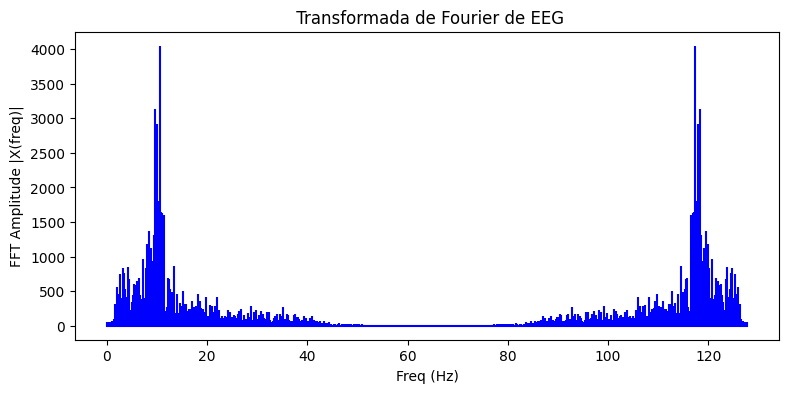

In [5]:
ta=5
tb=10
t_a=fm*ta
t_b=fm*tb
datosf=np.array(datosfilt)[t_a:t_b,7]
X = fft(datosf)
N = len(X)
n = np.arange(N)
T = N/fm
freq = n/T 

plt.figure(figsize = (20,4 ))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title(' Transformada de Fourier de EEG')

(0.0, 64.0)

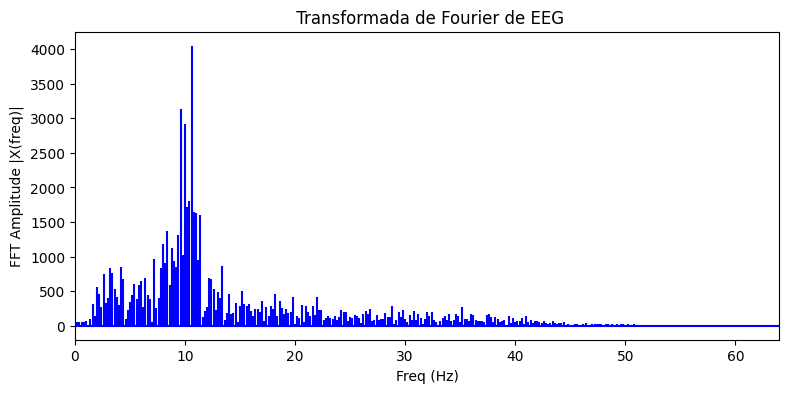

In [6]:
plt.figure(figsize = (20,4 ))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title(' Transformada de Fourier de EEG')
plt.xlim(0,64)

Las frecuencia de interés en este caso se encuentran en máximo 45 Hz. Con esta visualización tenemos una primera aproximación a las componentes de la señal, aunque se recomiendan otras visualizaciones que obtendremos más adelante.

In [7]:
#Generando las condiciones que necesitamos para las gráficas de voltaje
chan=6
fm=128 #frecuencia de muestreo
ti_a=60 #tiempo de inicio, debe ser número entero
tf_a=90 #tiempo final, debe ser número entero
pt=(tf_a-ti_a)*fm#numero de puntos
t1_a=ti_a*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2_a=tf_a*fm
#Datos para la primera gráfica de voltaje
pt_a=(tf_a-ti_a)*fm#numero de puntos
t_a=np.linspace(ti_a,tf_a,pt)
v_a= np.array(datosfilt)[t1_a:t2_a,chan]

In [8]:
#Brindando las condiciones para obtener un PSD sobre un conjunto de datos
ti_b=30 #tiempo de inicio, debe ser número entero
tf_b=60 #tiempo final, debe ser número entero
pt_b=(tf_b-ti_b)*fm#numero de puntos
t1_b=ti_b*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2_b=tf_b*fm
t_b=np.linspace(ti_b,tf_b,pt)
v_b = np.array(datosfilt)[t1_b:t2_b,chan]

In [9]:
#Parámetros para definir los rangos de las ondas

win = 2*fm
freqs, psd_a = signal.welch(np.array(datosfilt)[t1_a:t2_a,chan], fm, nperseg=win)
freqs, psd_b = signal.welch(np.array(datosfilt)[t1_b:t2_b,chan], fm, nperseg=win)
#Delta de 2 a 4
low_delta, high_delta = 2, 4
# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low_delta, freqs <= high_delta)
#Theta 4-8
low_theta, high_theta = 4, 8
# Find intersecting values in frequency vector
idx_theta = np.logical_and(freqs >= low_theta, freqs <= high_theta)
#Alpha de 8 a 13
freq_alpha=low_alpha, high_alpha = 8, 13
freq_alpha_ar = np.array(freq_alpha)
# Find intersecting values in frequency vector
idx_alpha = np.logical_and(freqs >= low_alpha, freqs <= high_alpha)
#Beta de 13 a 30
low_beta, high_beta = 13, 30
#Gamma de 30 a 45
low_gamma, high_gamma = 30, 45
# Find intersecting values in frequency vector
idx_gamma = np.logical_and(freqs >= low_gamma, freqs <= high_gamma)
# Find intersecting values in frequency vector
idx_beta = np.logical_and(freqs >= low_beta, freqs <= high_beta)  

In [10]:
#Resolución de frecuencia
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Potencia absoluta utilizando el método de simpson
delta_power_a = simpson(psd_a[idx_delta], dx=freq_res)
theta_power_a = simpson(psd_a[idx_theta], dx=freq_res)
alpha_power_a= simpson(psd_a[idx_alpha], dx=freq_res)
beta_power_a = simpson(psd_a[idx_beta], dx=freq_res)
gamma_power_a = simpson(psd_a[idx_gamma], dx=freq_res)
#Potencia relativa
total_power_a = simpson(psd_a, dx=freq_res)
delta_rel_power_a= delta_power_a/total_power_a
theta_rel_power_a= theta_power_a/total_power_a
alpha_rel_power_a= alpha_power_a/total_power_a
beta_rel_power_a= beta_power_a/total_power_a
gamma_rel_power_a = gamma_power_a/total_power_a

# Método de simpson para el área bajo la curva
delta_power_b = simpson(psd_b[idx_delta], dx=freq_res)
theta_power_b = simpson(psd_b[idx_theta], dx=freq_res)
alpha_power_b= simpson(psd_b[idx_alpha], dx=freq_res)
beta_power_b = simpson(psd_b[idx_beta], dx=freq_res)
gamma_power_b = simpson(psd_b[idx_gamma], dx=freq_res)
# Potencia relativa 
total_power_b = simpson(psd_b, dx=freq_res)
delta_rel_power_b= delta_power_b/total_power_b
theta_rel_power_b= theta_power_b/total_power_b
alpha_rel_power_b= alpha_power_b/total_power_b
beta_rel_power_b= beta_power_b/total_power_b
gamma_rel_power_b = gamma_power_b/total_power_b

In [11]:
# Diseñar un filtro pasa-banda para el rango de frecuencias alfa
#Filtro de orden 4 
b, a = signal.butter(4, freq_alpha_ar / (fm / 2), btype='bandpass')

# Aplicar el filtro a las señales de EEG
filtered_a = signal.filtfilt(b, a, v_a)
filtered_b = signal.filtfilt(b, a, v_b)


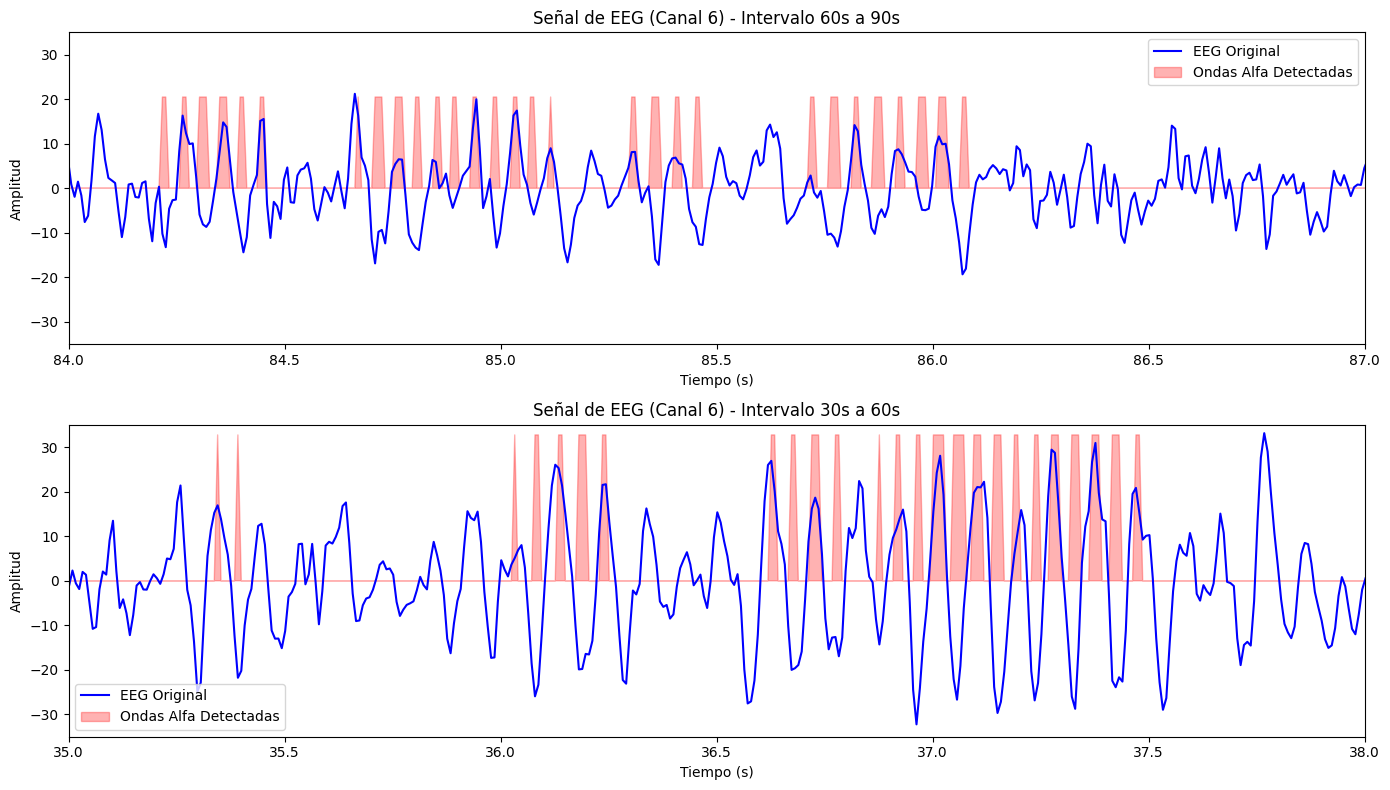

In [12]:
# Calcular la potencia de las señales filtradas
power_a = np.abs(filtered_a) ** 2
power_b = np.abs(filtered_b) ** 2

# Detectar las ondas alfa (umbral de potencia)
alpha_threshold_a = np.mean(power_a) + np.std(power_a)
alpha_indices_a = np.where(power_a > alpha_threshold_a)[0]

alpha_threshold_b = np.mean(power_b) + np.std(power_b)
alpha_indices_b = np.where(power_b > alpha_threshold_b)[0]

# Crear máscaras para las ondas alfa detectadas
alpha_mask_a = np.zeros_like(v_a)
alpha_mask_a[alpha_indices_a] = 1

alpha_mask_b = np.zeros_like(v_b)
alpha_mask_b[alpha_indices_b] = 1

# Visualizar las señales y las ondas alfa detectadas
plt.figure(figsize=(14, 8))

# Primera gráfica (intervalo a)
plt.subplot(2, 1, 1)
plt.plot(t_a, v_a, label='EEG Original', color='blue')
plt.fill_between(t_a, 0, alpha_mask_a * np.max(filtered_a), color='red', alpha=0.3, label='Ondas Alfa Detectadas')
plt.title(f'Señal de EEG (Canal {chan}) - Intervalo {ti_a}s a {tf_a}s')
plt.xlabel('Tiempo (s)')
plt.xlim(84,87)
plt.ylabel('Amplitud')
plt.ylim(-35,35)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_b, v_b, label='EEG Original', color='blue')
plt.fill_between(t_b, 0, alpha_mask_b * np.max(filtered_b), color='red', alpha=0.3, label='Ondas Alfa Detectadas')
plt.title(f'Señal de EEG (Canal {chan}) - Intervalo {ti_b}s a {tf_b}s')
plt.xlabel('Tiempo (s)')
plt.xlim(35,38)
plt.ylabel('Amplitud')
plt.ylim(-35,35)
plt.legend()


plt.tight_layout()
plt.show()


<BarContainer object of 5 artists>

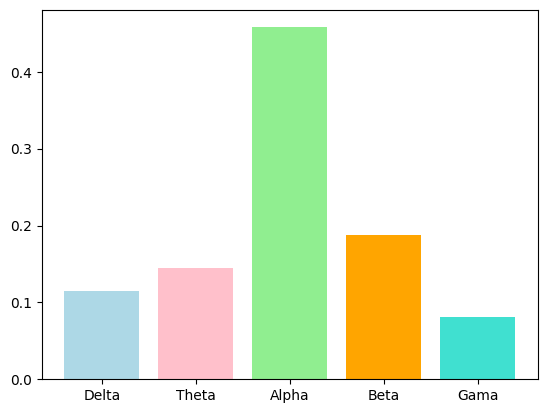

In [13]:
#Condiciones para generar el histograma
categorias = ["Delta", "Theta", "Alpha", "Beta", "Gama"]
valores_a = [delta_rel_power_a, theta_rel_power_a, alpha_rel_power_a, beta_rel_power_a, gamma_rel_power_a]
valores_b= [delta_rel_power_b, theta_rel_power_b, alpha_rel_power_b, beta_rel_power_b, gamma_rel_power_b]
colores = ["lightblue", "pink", "lightgreen", "orange", "turquoise"]
plt.bar(categorias, valores_a, color=colores)

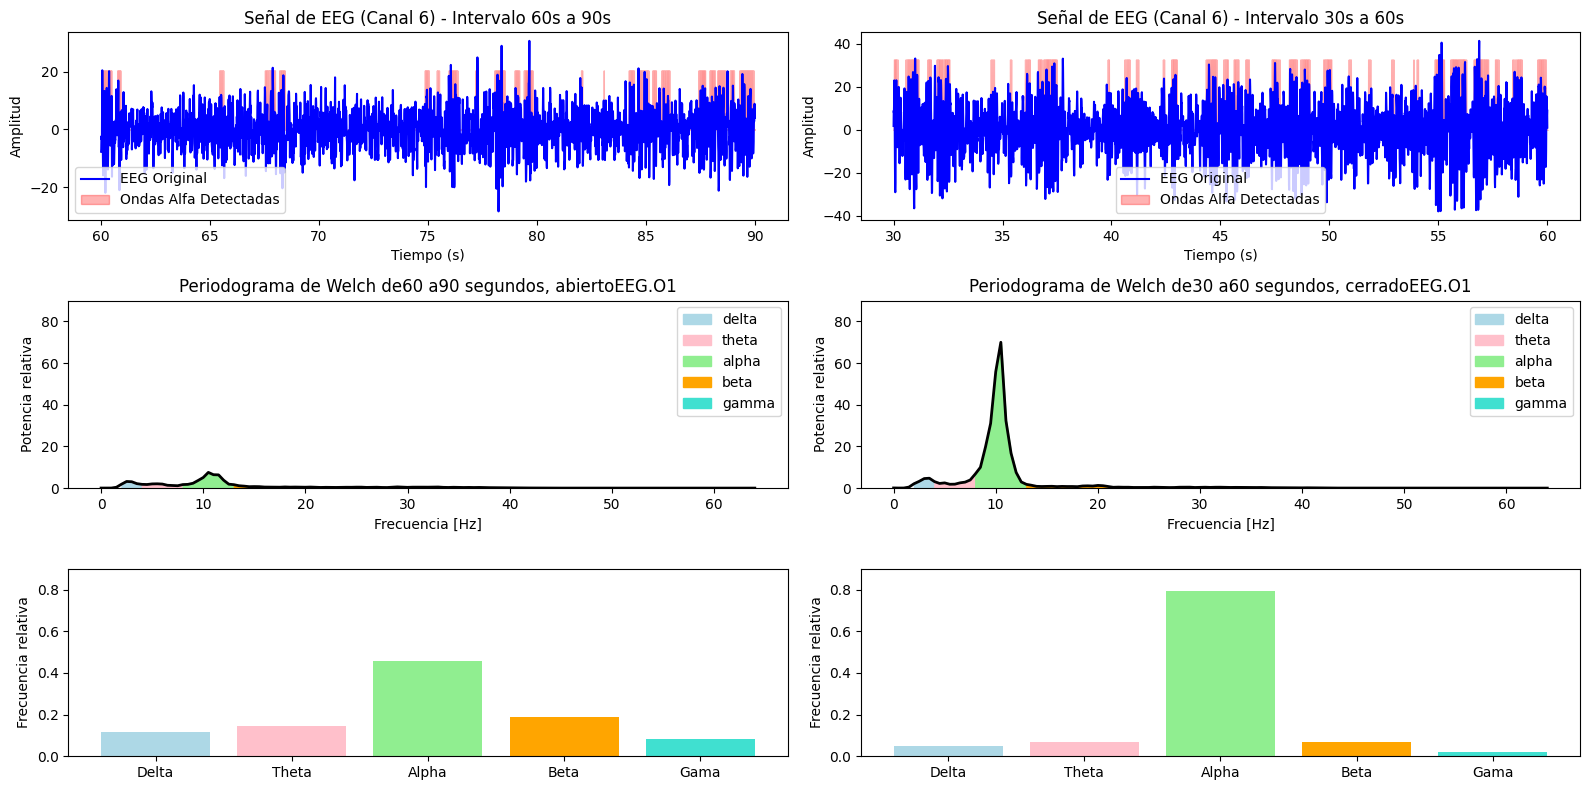

In [14]:
figure, axis = plt.subplots(3, 2, figsize=(16, 8))

axis[0, 0].plot(t_a, v_a, label='EEG Original', color='blue')
axis[0, 0].fill_between(t_a, 0, alpha_mask_a * np.max(filtered_a), color='red', alpha=0.3, label='Ondas Alfa Detectadas')
axis[0, 0].set_title(f'Señal de EEG (Canal {chan}) - Intervalo {ti_a}s a {tf_a}s')
axis[0, 0].set_xlabel('Tiempo (s)')
axis[0, 0].set_ylabel('Amplitud')
axis[0, 0].legend()


axis[0, 1].plot(t_b, v_b, label='EEG Original', color='blue')
axis[0, 1].set_title(f'Señal de EEG (Canal {chan}) - Intervalo {ti_b}s a {tf_b}s')
axis[0, 1].set_xlabel('Tiempo (s)')
axis[0, 1].set_ylabel('Amplitud')
axis[0, 1].fill_between(t_b, 0, alpha_mask_b * np.max(filtered_b), color='red', alpha=0.3, label='Ondas Alfa Detectadas')
axis[0, 1].legend()

axis[1, 0].plot(freqs, psd_a, color='k', lw=2)
axis[1, 0].fill_between(freqs, psd_a, where=idx_delta, color='lightblue', label="delta")
axis[1, 0].fill_between(freqs, psd_a, where=idx_theta, color='pink', label="theta")
axis[1, 0].fill_between(freqs, psd_a, where=idx_alpha, color='lightgreen', label="alpha")
axis[1, 0].fill_between(freqs, psd_a, where=idx_beta, color='orange', label="beta")
axis[1, 0].fill_between(freqs, psd_a, where=idx_gamma, color='turquoise', label="gamma")
axis[1, 0].legend(loc="upper right")
axis[1,0].set_ylim([0,90])
axis[1,0].set_xlabel("Frecuencia [Hz]")
axis[1,0].set_ylabel("Potencia relativa")  
axis[1, 0].set_title("Periodograma de Welch de" +str(ti_a) + ' a'+ str(tf_a) + ' segundos, abierto'+str(nombres[6]))
  
axis[1, 1].plot(freqs, psd_b, color='k', lw=2)
axis[1, 1].fill_between(freqs, psd_b, where=idx_delta, color='lightblue', label="delta")
axis[1, 1].fill_between(freqs, psd_b, where=idx_theta, color='pink', label="theta")
axis[1, 1].fill_between(freqs, psd_b, where=idx_alpha, color='lightgreen', label="alpha")
axis[1, 1].fill_between(freqs, psd_b, where=idx_beta, color='orange', label="beta")
axis[1, 1].fill_between(freqs, psd_b, where=idx_gamma, color='turquoise', label="gamma")
axis[1, 1].legend(loc="upper right")
axis[1,1].set_ylim([0,90])
axis[1,1].set_xlabel("Frecuencia [Hz]")
axis[1, 1].set_title("Periodograma de Welch de" +str(ti_b) + ' a'+ str(tf_b) + ' segundos, cerrado'+str(nombres[6]))
axis[1,1].set_ylabel("Potencia relativa")  



axis[2,0].bar(categorias, valores_a, color=colores)
axis[2,0].set_ylim([0,0.9])
axis[2,0].set_ylabel("Frecuencia relativa")
axis[2,1].bar(categorias, valores_b, color=colores)
axis[2,1].set_ylim([0,0.9])
axis[2,1].set_ylabel("Frecuencia relativa")
figure.tight_layout()
plt.show()

Explicar método de Simpson para calcular potencia relativa.
* Explica por qué utilizamos el método de Simpson en esta aplicación y en qué consiste. ¿Sobre qué está construida la función?

Es un método de integración numérica donde se dividen los intervalos en función

La idea principal es aproximar la función que se está integrando por una función cuadrática (una parábola) en cada subintervalo del intervalo de integración.
Luego, se calcula el área bajo estas parábolas y se suman para obtener una aproximación del área total bajo la curva original.
Pasos generales

División del intervalo:
El intervalo de integración [a, b] se divide en un número par (n) de subintervalos de igual ancho.
El ancho de cada subintervalo es h = (b - a) / n.
Cálculo de los valores de la función:
Se evalúa la función en los puntos extremos y en los puntos medios de cada subintervalo.
Aplicación de la fórmula:
La fórmula del método de Simpson es:

∫[a, b] f(x) dx ≈ (h / 3) [f(x0) + 4f(x1) + 2f(x2) + 4f(x3) + ... + 2f(xn-2) + 4f(xn-1) + f(xn)]

Donde:

x0 = a
xn = b
x1, x2, ..., xn-1 son los puntos intermedios.
h es el ancho de los subintervalos.
Interpretación:
Como se ve en la formula, se le dan diferentes pesos a los valores de la función. Los valores de los extremos tienen un peso de 1. Los puntos intermedios impares tienen un peso de 4 y los puntos intermedios pares tienen un peso de 2.
Consideraciones

El método de Simpson es generalmente más preciso que la regla del trapecio, especialmente para funciones que son suaves.
Requiere que el número de subintervalos sea par.
Existen variaciones del método, como la regla de Simpson 3/8, que se utiliza cuando el número de subintervalos es impar.
